In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
df = pd.read_csv("Login (13).csv")

In [124]:
df.head()

,city,cab,cat,dt,login_hr,active_hr,dryrun_hr,idle_hr
0,hyderabad,AP01TV0710,mini,2018-02-01,4.291667,2.783333,0.766667,0.458333
1,hyderabad,AP01TV0776,mini,2018-02-25,11.368889,9.416667,0.316667,1.568889
2,hyderabad,AP01TV0776,mini,2018-03-21,0.110278,0.000000,0.000000,0.110278
3,hyderabad,AP01TV3959,mini,2018-02-12,4.467222,1.883333,0.550000,1.900556
4,hyderabad,AP01TV3959,mini,2018-03-28,0.800278,0.000000,0.000000,0.800278


In [125]:
df = df.sort_values(by=['cab','dt'],ascending=[True,True])

In [126]:
df = df.drop("active_hr",axis=1)
df = df.drop("dryrun_hr",axis=1)
df = df.drop("idle_hr",axis=1)

In [127]:
df.head()

,city,cab,cat,dt,login_hr
407633,hyderabad,A29TV6235,prime,2018-01-03,4.795278
780009,hyderabad,A29TV6235,prime,2018-01-04,0.683611
111050,hyderabad,A29TV6235,prime,2018-01-06,0.271667
37013,hyderabad,A29TV6235,prime,2018-01-08,1.525278
853893,hyderabad,A29TV6235,prime,2018-01-09,2.104167


In [128]:
df["cat"].value_counts()

mini           330231
prime          269495
prime_play     194763
economy_suv     61239
micro           16816
kp                 27
sedan               4
exec                1
Name: cat, dtype: int64

In [129]:
df = df[df.cat != "kp"]
df = df[df.cat != "sedan"]

In [130]:
df["cat"] = df["cat"].map({'prime':"prime",'prime_play':"prime",'mini':"mini",'economy_suv':"economy_suv",'micro':"micro"})
df["cat"].value_counts()

prime          464258
mini           330231
economy_suv     61239
micro           16816
Name: cat, dtype: int64

In [131]:
df = df[df.dt<='2018-02-25']

In [132]:
number_of_days = df["cab"].value_counts()
number_of_days = number_of_days.sort_index()
total_login_hours = df.groupby(["cab"])["login_hr"].sum()
total_login_hours = total_login_hours.sort_index()

In [133]:
df1 = pd.concat([number_of_days,total_login_hours],axis=1)
df1.columns = ['number_of_days', 'total_login_hours']
df1.describe()

,number_of_days,total_login_hours
count,20661.000000,20661.000000
mean,26.075698,226.805174
std,15.786109,208.602629
min,1.000000,0.003056
25%,12.000000,59.417778
50%,26.000000,167.141389
75%,40.000000,343.843889
max,57.000000,1126.463889


In [134]:
df1["login_hours_per_day"] = df1["total_login_hours"]/df1["number_of_days"]
df1["attendancep"] = df1["number_of_days"]/56

In [135]:
df1.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep
count,20661.000000,20661.000000,20661.000000,20661.000000
mean,26.075698,226.805174,7.383601,0.465637
std,15.786109,208.602629,3.978957,0.281895
min,1.000000,0.003056,0.003056,0.017857
25%,12.000000,59.417778,4.363000,0.214286
50%,26.000000,167.141389,7.380328,0.464286
75%,40.000000,343.843889,10.040685,0.714286
max,57.000000,1126.463889,21.497978,1.017857


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
df_feat = pd.DataFrame(scaled_features,columns=df1.columns)
df_feat.head()

,number_of_days,total_login_hours,login_hours_per_day,attendancep
0,0.248598,-0.685706,-1.153927,0.248598
1,0.375295,0.009957,-0.058065,0.375295
2,-0.891672,-0.686792,-0.106003,-0.891672
3,-1.208414,-0.972622,-0.996933,-1.208414
4,-1.525156,-1.086350,-1.831168,-1.525156


In [137]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [138]:
kmeans.fit(df_feat.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

0    8385
1    7877
2    4399
Name: labels, dtype: int64

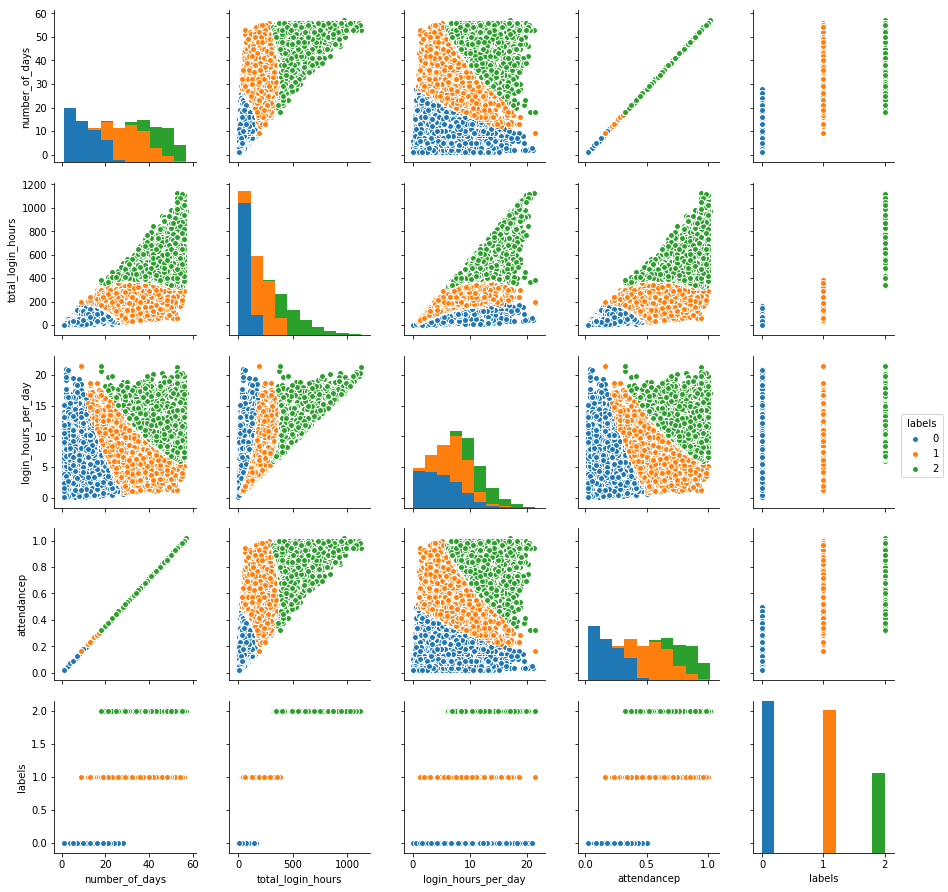

In [139]:
df1["labels"] = kmeans.labels_
sns.pairplot(df1,hue="labels")
print("\n")
df1["labels"].value_counts()

In [154]:
cluster1df = df1[df1.labels == 0]
cluster2df = df1[df1.labels == 1]
cluster3df = df1[df1.labels == 2]

In [155]:
cluster1df.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep,labels
count,8385.000000,8385.000000,8385.000000,8385.000000,8385.0
mean,10.108050,52.917010,4.925595,0.180501,0.0
std,6.472675,44.690906,3.348249,0.115583,0.0
min,1.000000,0.003056,0.003056,0.017857,0.0
25%,4.000000,13.291667,2.232870,0.071429,0.0
50%,10.000000,42.615833,4.538460,0.178571,0.0
75%,15.000000,84.990833,7.146806,0.267857,0.0
max,28.000000,179.257222,20.998750,0.500000,0.0


In [156]:
cluster2df.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep,labels
count,7877.000000,7877.000000,7877.000000,7877.000000,7877.0
mean,31.952139,228.602093,7.384836,0.570574,1.0
std,7.766535,81.805409,2.647127,0.138688,0.0
min,9.000000,26.128611,0.900987,0.160714,1.0
25%,26.000000,166.513611,5.575251,0.464286,1.0
50%,32.000000,224.380278,7.492751,0.571429,1.0
75%,38.000000,293.194167,9.143683,0.678571,1.0
max,56.000000,393.695833,21.405309,1.000000,1.0


In [157]:
cluster3df.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep,labels
count,4399.000000,4399.000000,4399.000000,4399.000000,4399.0
mean,45.989316,555.038393,12.066631,0.821238,2.0
std,6.177577,152.342628,2.645360,0.110314,0.0
min,18.000000,321.851111,5.960206,0.321429,2.0
25%,42.000000,436.714861,10.153381,0.750000,2.0
50%,47.000000,513.422500,11.737978,0.839286,2.0
75%,51.000000,634.217361,13.641108,0.910714,2.0
max,57.000000,1126.463889,21.497978,1.017857,2.0


In [158]:
pdf = pd.read_csv("login_hours.csv")
pdf = pdf.sort_values(by=['car_number','active_date'],ascending=[True,True])
pdf = pdf[pdf.category != "bike_delivery"]
pdf = pdf[pdf.category != "bike"]
pdf = pdf[pdf.category != "ets_ola"]
pdf = pdf[pdf.category != "electric_vehicle"]
pdf = pdf[pdf.category != "sedan"]
pdf = pdf[pdf.category != "auto"]
pdf = pdf[pdf.category != "exec"]

In [159]:
pdf["category"] = pdf["category"].map({'prime':"prime",'prime_play':"prime",'mini':"mini",'economy_suv':"economy_suv",'micro':"micro",'exec':"exec"})
pdf.head()

,active_date,wk,category,service_city,car_number,login_hours,active_hours
214857,2018-10-12,41,prime,hyderabad,A29TV6235,2.744167,1.533333
406106,2018-10-25,43,prime,hyderabad,A29TV6235,1.417778,0.733333
1169997,2018-10-26,43,prime,hyderabad,A29TV6235,0.208333,0.000000
1099059,2018-10-27,43,prime,hyderabad,A29TV6235,0.188889,0.000000
1217353,2018-10-29,44,prime,hyderabad,A29TV6235,0.600556,0.316667


In [160]:
pdf = pdf[pdf.wk != 41]
pdf = pdf[pdf.wk != 42]
pdf = pdf[pdf.wk != 43]
pdf = pdf[pdf.wk != 44]
pdf = pdf[pdf.wk != 40]

In [161]:
number_of_days = pdf["car_number"].value_counts()
number_of_days = number_of_days.sort_index()
total_login_hours = pdf.groupby(["car_number"])["login_hours"].sum()
total_login_hours = total_login_hours.sort_index()

In [162]:
pdf1 = pd.concat([number_of_days,total_login_hours],axis=1)
pdf1.columns = ['number_of_days', 'total_login_hours']
pdf1["login_hours_per_day"] = pdf1["total_login_hours"]/pdf1["number_of_days"]
pdf1["attendancep"] = pdf1["number_of_days"]/28

In [163]:
pdf1.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep
count,16679.000000,16679.000000,16679.000000,16679.000000
mean,13.599676,121.307639,6.923478,0.485703
std,8.666393,131.404625,4.999522,0.309514
min,1.000000,0.004167,0.004167,0.035714
25%,5.000000,15.917222,2.553512,0.178571
50%,13.000000,70.488889,6.339811,0.464286
75%,21.000000,188.092361,10.364250,0.750000
max,28.000000,654.311389,23.368264,1.000000


In [164]:
pcluster1df = pdf1.loc[cluster1df.index.values]
pcluster2df = pdf1.loc[cluster2df.index.values]
pcluster3df = pdf1.loc[cluster3df.index.values]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/sta

In [165]:
pcluster1df.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep
count,3054.000000,3054.000000,3054.000000,3054.000000
mean,10.242633,63.735995,4.693803,0.365808
std,7.647388,83.033946,3.829896,0.273121
min,1.000000,0.004444,0.004444,0.035714
25%,3.000000,6.589861,1.438115,0.107143
50%,9.000000,28.309722,3.729445,0.321429
75%,16.000000,90.868681,7.280139,0.571429
max,28.000000,556.178333,20.989178,1.000000


In [166]:
pcluster2df.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep
count,4310.000000,4310.000000,4310.000000,4310.000000
mean,12.701160,84.888512,5.518842,0.453613
std,7.903178,88.837984,3.889380,0.282256
min,1.000000,0.008889,0.008889,0.035714
25%,5.000000,14.418194,2.160637,0.178571
50%,13.000000,54.193056,5.008914,0.464286
75%,19.000000,129.640764,8.163550,0.678571
max,28.000000,583.643611,21.616430,1.000000


In [167]:
pcluster3df.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep
count,2777.000000,2777.000000,2777.000000,2777.000000
mean,17.780338,195.757481,9.838629,0.635012
std,8.098324,134.445582,4.645658,0.289226
min,1.000000,0.008056,0.008056,0.035714
25%,12.000000,78.256944,6.778792,0.428571
50%,20.000000,188.737778,10.248462,0.714286
75%,25.000000,293.949167,13.110504,0.892857
max,28.000000,611.053611,21.823343,1.000000


In [168]:
0.485703*7

3.399921

In [170]:
pcluster3df[pcluster3df.total_login_hours<6.923].describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep
count,166.000000,166.000000,166.000000,166.000000
mean,2.512048,2.418973,1.104032,0.089716
std,2.096860,2.095202,1.135294,0.074888
min,1.000000,0.008056,0.008056,0.035714
25%,1.000000,0.544097,0.367684,0.035714
50%,2.000000,1.921667,0.777222,0.071429
75%,3.000000,3.993889,1.539028,0.107143
max,14.000000,6.913889,6.509167,0.500000


In [171]:
pcluster3df[pcluster3df.attendancep*7 < 3.395]

,number_of_days,total_login_hours,login_hours_per_day,attendancep
count,793.000000,793.000000,793.000000,793.000000
mean,6.771753,50.541191,6.451321,0.241848
std,3.939839,49.283702,4.609606,0.140709
min,1.000000,0.008056,0.008056,0.035714
25%,3.000000,9.822778,2.387963,0.107143
50%,7.000000,33.856111,6.003519,0.250000
75%,10.000000,79.208333,9.908250,0.357143
max,13.000000,222.248889,21.127897,0.464286


In [172]:
temp_var = pcluster3df[pcluster3df.total_login_hours<6.923]
temp_var = temp_var[temp_var.attendancep*7 < 3.395]

In [173]:
temp_var.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep
count,165.000000,165.000000,165.000000,165.000000
mean,2.442424,2.401894,1.108456,0.087229
std,1.901064,2.089958,1.137314,0.067895
min,1.000000,0.008056,0.008056,0.035714
25%,1.000000,0.543889,0.365556,0.035714
50%,2.000000,1.916389,0.780278,0.071429
75%,3.000000,3.975556,1.547500,0.107143
max,10.000000,6.913889,6.509167,0.357143


0    7373
1    5929
2    3377
Name: labels, dtype: int64

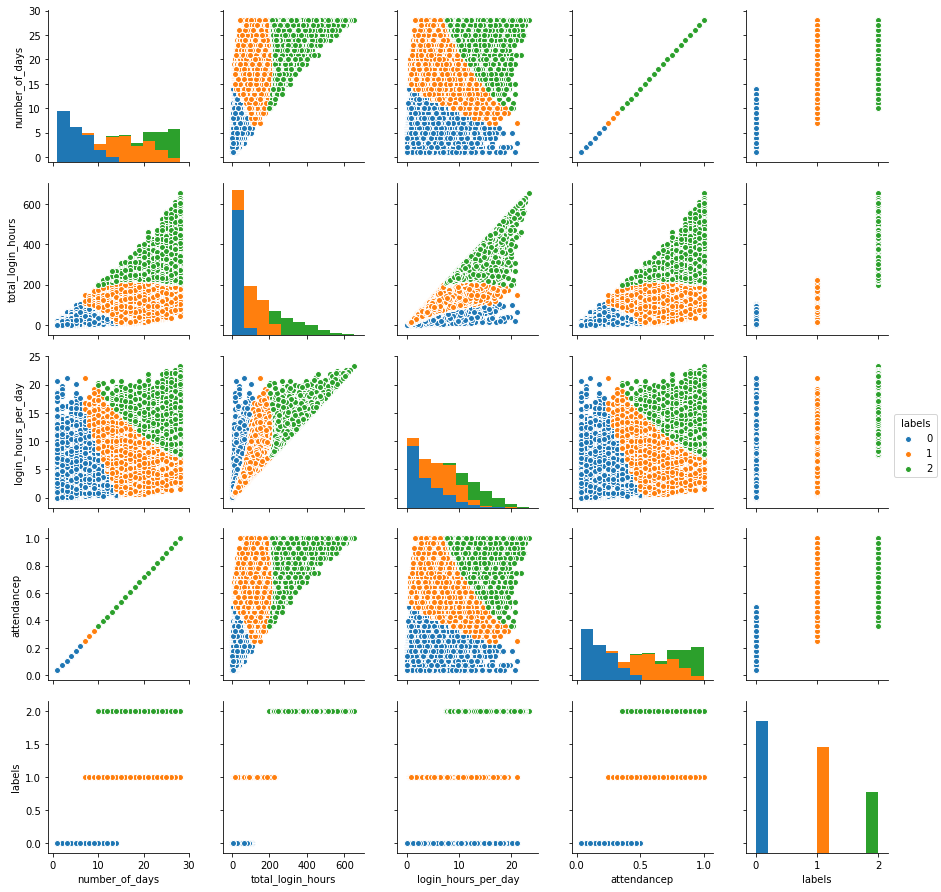

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pdf1)
scaled_features = scaler.transform(pdf1)
df_feat = pd.DataFrame(scaled_features,columns=pdf1.columns)
df_feat.head()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_feat.values)
pdf1["labels"] = kmeans.labels_
sns.pairplot(pdf1,hue="labels")
print("\n")
pdf1["labels"].value_counts()

In [176]:
pcdf1 = pdf1[pdf1.labels == 0]
pcdf2 = pdf1[pdf1.labels == 1]
pcdf3 = pdf1[pdf1.labels == 2]

In [177]:
pcdf1.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep,labels
count,7373.000000,7373.000000,7373.000000,7373.000000,7373.0
mean,5.215787,20.372281,3.648418,0.186278,0.0
std,3.378013,21.362136,3.319423,0.120643,0.0
min,1.000000,0.004167,0.004167,0.035714,0.0
25%,2.000000,3.439722,1.014500,0.071429,0.0
50%,5.000000,12.758056,2.634653,0.178571,0.0
75%,8.000000,31.394444,5.566389,0.285714,0.0
max,14.000000,106.067222,21.139537,0.500000,0.0


In [179]:
pcdf2.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep,labels
count,5929.000000,5929.000000,5929.000000,5929.000000,5929.0
mean,17.830157,120.657905,6.960055,0.636791,1.0
std,4.307354,54.067253,3.120033,0.153834,0.0
min,7.000000,7.826944,0.521796,0.250000,1.0
25%,15.000000,78.378333,4.597500,0.535714,1.0
50%,18.000000,118.853333,7.054268,0.642857,1.0
75%,21.000000,164.763611,9.104444,0.750000,1.0
max,28.000000,228.220000,21.127897,1.000000,1.0


In [180]:
pcdf3.describe()

,number_of_days,total_login_hours,login_hours_per_day,attendancep,labels
count,3377.000000,3377.000000,3377.000000,3377.000000,3377.0
mean,24.476755,342.820425,14.009695,0.874170,2.0
std,3.202599,88.544204,2.944470,0.114379,0.0
min,10.000000,199.091667,7.468849,0.357143,2.0
25%,23.000000,269.400278,11.799722,0.821429,2.0
50%,25.000000,326.555278,13.768996,0.892857,2.0
75%,27.000000,402.730278,15.999289,0.964286,2.0
max,28.000000,654.311389,23.368264,1.000000,2.0


In [206]:
pcdf1.loc[cluster1df.index.values].describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,number_of_days,total_login_hours,login_hours_per_day,attendancep,labels
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.0
mean,5.112460,17.236132,3.081621,0.182588,0.0
std,3.370818,19.060385,2.915062,0.120386,0.0
min,1.000000,0.004444,0.004444,0.035714,0.0
25%,2.000000,2.520694,0.850995,0.071429,0.0
50%,4.000000,10.485417,2.141250,0.142857,0.0
75%,8.000000,25.542569,4.528545,0.285714,0.0
max,14.000000,99.797778,19.716111,0.500000,0.0


In [212]:
1894/3054

0.6201702685003274

In [225]:
edf = pd.read_csv("Login (13).csv")

In [226]:
edf = edf.sort_values(by=['cab','dt'],ascending=[True,True])
edf = edf.drop("active_hr",axis=1)
edf = edf.drop("dryrun_hr",axis=1)
edf = edf.drop("idle_hr",axis=1)
edf = edf[edf.dt>'2018-02-25']
edf = edf[edf.dt<='2018-03-04']
edf

,city,cab,cat,dt,login_hr
817049,hyderabad,A29TV6235,prime,2018-02-26,2.574167
556747,hyderabad,A29TV6235,prime,2018-02-28,1.294722
780011,hyderabad,A29TV6235,prime,2018-03-02,0.696389
593971,hyderabad,A29TV6235,prime,2018-03-04,0.282222
482360,hyderabad,AP01TV0776,mini,2018-02-27,14.040556
705332,hyderabad,AP01TV0776,mini,2018-03-01,12.183056
111060,hyderabad,AP01TV3714,mini,2018-02-26,3.026389
370683,hyderabad,AP01TV3714,mini,2018-02-27,8.363056
482364,hyderabad,AP01TV3714,mini,2018-02-28,2.733889
407640,hyderabad,AP01TV3714,mini,2018-03-01,3.010278


In [227]:
edf = edf[edf.cat != "kp"]
edf = edf[edf.cat != "sedan"]
edf["cat"] = edf["cat"].map({'prime':"prime",'prime_play':"prime",'mini':"mini",'economy_suv':"economy_suv",'micro':"micro"})
edf["cat"].value_counts()

prime          35658
mini           25116
economy_suv     4725
micro           1225
Name: cat, dtype: int64

In [228]:
number_of_days = edf["cab"].value_counts()
number_of_days = number_of_days.sort_index()
total_login_hours = edf.groupby(["cab"])["login_hr"].sum()
total_login_hours = total_login_hours.sort_index()
edf1 = pd.concat([number_of_days,total_login_hours],axis=1)
edf1.columns = ['number_of_days', 'total_login_hours']
edf1.describe()

,number_of_days,total_login_hours
count,15024.000000,15024.000000
mean,4.441161,38.867393
std,2.022308,32.172137
min,1.000000,0.003333
25%,3.000000,11.585278
50%,5.000000,33.059167
75%,6.000000,58.184375
max,7.000000,162.630000


In [233]:
edf1.loc[cluster1df.index.values].describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,number_of_days,total_login_hours
count,4026.000000,4026.000000
mean,3.458023,22.487307
std,2.008022,24.606563
min,1.000000,0.004722
25%,2.000000,3.765139
50%,3.000000,13.616806
75%,5.000000,34.199722
max,7.000000,152.868333


In [234]:
4026/8385

0.48014311270125226